<a href="https://colab.research.google.com/github/gc2321/3546-Deep-Learning/blob/main/pytorch/2_1_RNN_sine_wave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Fashion-MNIST Dataset

In [ ]:
transform = transforms.ToTensor()

train_data = datasets.FashionMNIST(root='../Data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='../Data', train=False, download=True, transform=transform)

class_names = ['T-shirt','Trouser','Sweater','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Boot']

100%|██████████| 26421880/26421880 [00:01<00:00, 18212549.54it/s]


Extracting ../Data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../Data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 313259.64it/s]


Extracting ../Data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../Data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5418549.31it/s]


Extracting ../Data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../Data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 11903129.54it/s]


Extracting ../Data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../Data/FashionMNIST/raw



## Create Data loaders

In [ ]:
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

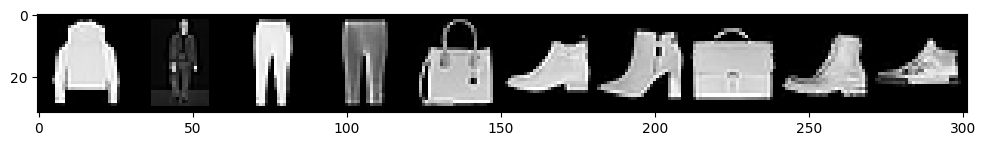

In [ ]:
for images,labels in train_loader:
    break

im = make_grid(images, nrow=10)
plt.figure(figsize=(12,4))

plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

Label:  [5 1 8 7 0 0 7 6 0 1]
Class:  Sandal Trouser Bag Sneaker T-shirt T-shirt Sneaker Shirt T-shirt Trouser


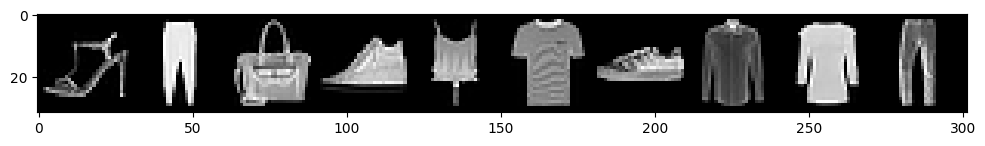

In [ ]:
for images,labels in train_loader:
    break

print('Label: ', labels.numpy())
print('Class: ', *np.array([class_names[i] for i in labels]))

im = make_grid(images, nrow=10)
plt.figure(figsize=(12,4))

plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [ ]:
# If a 28x28 image is passed through a Convolutional layer using a 5x5 filter, a step size of 1, and no padding, what is the resulting matrix size?
conv = nn.Conv2d(1, 1, 5, 1)
for x,labels in train_loader:
    print('Orig size:',x.shape)
    break
x = conv(x)
print('Down size:',x.shape)

Orig size: torch.Size([10, 1, 28, 28])
Down size: torch.Size([10, 1, 24, 24])


In [ ]:
#  If the sample from question 3 is then passed through a 2x2 MaxPooling layer, what is the resulting matrix size?
x = F.max_pool2d(x, 2, 2)
print('Down size:',x.shape)

Down size: torch.Size([10, 1, 12, 12])


## Define Model

In [ ]:
# input is 28x28, output is 10,
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(5*5*16, 100)
        self.fc2 = nn.Linear(100, 10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 5*5*16)
        X = F.relu(self.fc1(X))
        X = self.fc2(X)
        return F.log_softmax(X, dim=1)

torch.manual_seed(101)
model = ConvolutionalNetwork()

In [ ]:
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)

In [ ]:
## Trainable parameters
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')

count_parameters(model)

    54
     6
   864
    16
 40000
   100
  1000
    10
______
 42050


In [ ]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## Train the model

In [ ]:
epochs = 5

for i in range(epochs):
    for X_train, y_train in train_loader:

        # Apply the model
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # OPTIONAL print statement
    print(f'{i+1} of {epochs} epochs completed')

1 of 5 epochs completed
2 of 5 epochs completed
3 of 5 epochs completed
4 of 5 epochs completed
5 of 5 epochs completed


## Evaluate the model

In [ ]:
model.eval()

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_loader:
        y_val = model(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()

print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 8801/10000 =  88.010%
